Roka Hosono, Veda Pedagati, Jahnavi Tumeti
Project 2

In [1]:
!pip install ts2vg
!pip install igraph

run below cell


In [19]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import pandas as pd
from ts2vg import NaturalVG, HorizontalVG
import igraph as ig
import numpy as np

def create_VG(data,attribute,VGtype):
    if VGtype=="NVG":
        attribute="attr_"+attribute
        g=NaturalVG()
        g.build(data[attribute][1000:2024])
        ng=g.as_igraph()
        return ["NVG",ng.average_path_length(),np.mean(ng.degree()),ng.average_path_length()]
    elif VGtype=="HVG":
        attribute="attr_"+attribute
        g=HorizontalVG()
        g.build(data[attribute][1000:2024])
        ng=g.as_igraph()
        return ["HVG",ng.average_path_length(),np.mean(ng.degree()),ng.average_path_length()]

def create_chart(body_part):
    path=""
    numsubjects=15
    Activity=["Walking","Running","Climbing Up", "Climbing Down"]
    
    axis=["x","y","z"]

    data = {'Method': [],
            'Subject': [],
            'Accelorometer Axis':[],
            'Average Degree':[],
            'Network Diameter':[],
            'Average Path Length':[],
            'Activity':[],
            'Body Part':[]}
  
    # Create DataFrame
    chart = pd.DataFrame(data)



    for i in range(1,numsubjects+1):
        for j in Activity: 
            path="Subject "+str(i)+"/"+j+"/acc_"+j.lower().replace(" ","")+"_"+body_part+".csv"
            print(path)
            try:   
                file=pd.read_csv(path)  
            except:
                print("No such file exists")
                continue
            for l in axis:
                NVGData=create_VG(file,l,VGtype="NVG")
                HVGData=create_VG(file,l,VGtype="HVG")
                data2= {'Method': "NVG",
                    'Subject': i,
                    'Accelorometer Axis':l,
                    'Average Degree':NVGData[2],                        
                    'Network Diameter':NVGData[1],
                    'Average Path Length':NVGData[3],
                    'Activity':j,
                    'Body Part':body_part}
                
                data3= {'Method': "HVG",
                    'Subject': i,
                    'Accelorometer Axis':l,
                    'Average Degree':HVGData[2],
                    'Network Diameter':HVGData[1],
                    'Average Path Length':HVGData[3],
                    'Activity':j,
                    'Body Part':body_part}
                chart=chart.append(data2,ignore_index=True)
                chart=chart.append(data3,ignore_index=True)
    display(chart)
    return chart

body=["chest","forearm","head","shin","thigh","upperarm","waist"]
data = {'Method': [],
            'Subject': [],
            'Accelorometer Axis':[],
            'Average Degree':[],
            'Network Diameter':[],
            'Average Path Length':[],
            'Activity':[],
            'Body Part':[]}
  
    
chart=pd.DataFrame(data)

chart=create_chart(body_part="chest")

   
    
chart.to_csv("Accelometer_Visibility_Graph_Data_Subjects-chest.csv")

            




Subject 1/Walking/acc_walking_chest.csv
Subject 1/Running/acc_running_chest.csv
Subject 1/Climbing Up/acc_climbingup_chest.csv
Subject 1/Climbing Down/acc_climbingdown_chest.csv
Subject 2/Walking/acc_walking_chest.csv
Subject 2/Running/acc_running_chest.csv
Subject 2/Climbing Up/acc_climbingup_chest.csv
Subject 2/Climbing Down/acc_climbingdown_chest.csv
Subject 3/Walking/acc_walking_chest.csv
Subject 3/Running/acc_running_chest.csv
Subject 3/Climbing Up/acc_climbingup_chest.csv
Subject 3/Climbing Down/acc_climbingdown_chest.csv
Subject 4/Walking/acc_walking_chest.csv
Subject 4/Running/acc_running_chest.csv
Subject 4/Climbing Up/acc_climbingup_chest.csv
Subject 4/Climbing Down/acc_climbingdown_chest.csv
Subject 5/Walking/acc_walking_chest.csv
Subject 5/Running/acc_running_chest.csv
Subject 5/Climbing Up/acc_climbingup_chest.csv
Subject 5/Climbing Down/acc_climbingdown_chest.csv
Subject 6/Walking/acc_walking_chest.csv
Subject 6/Running/acc_running_chest.csv
Subject 6/Climbing Up/acc_clim

,Method,Subject,Accelorometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Body Part
0,NVG,1.0,x,11.451172,4.441492,4.441492,Walking,chest
1,HVG,1.0,x,3.958984,11.578024,11.578024,Walking,chest
2,NVG,1.0,y,11.986328,4.241050,4.241050,Walking,chest
3,HVG,1.0,y,3.951172,10.666252,10.666252,Walking,chest
4,NVG,1.0,z,8.570312,4.897722,4.897722,Walking,chest
...,...,...,...,...,...,...,...,...
355,HVG,15.0,x,3.951172,13.926625,13.926625,Climbing Down,chest
356,NVG,15.0,y,14.156250,5.840334,5.840334,Climbing Down,chest
357,HVG,15.0,y,3.941406,13.582100,13.582100,Climbing Down,chest
358,NVG,15.0,z,8.953125,4.692061,4.692061,Climbing Down,chest


USES Accelometer_Visibility_Graph_Data_Subjects.csv THAT WAS MADE FROM THE ABOVE CELL. The chest data was used for all of the observations since it has the least amount of oscillation of movement in each action. We can focus solely on a singlular axis to depict movement.

,Unnamed: 0,Method,Subject,Accelorometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Body Part
0,0,NVG,1.0,x,11.451172,4.441492,4.441492,Walking,chest
1,1,HVG,1.0,x,3.958984,11.578024,11.578024,Walking,chest
2,2,NVG,1.0,y,11.986328,4.241050,4.241050,Walking,chest
3,3,HVG,1.0,y,3.951172,10.666252,10.666252,Walking,chest
4,4,NVG,1.0,z,8.570312,4.897722,4.897722,Walking,chest
...,...,...,...,...,...,...,...,...,...
355,355,HVG,15.0,x,3.951172,13.926625,13.926625,Climbing Down,chest
356,356,NVG,15.0,y,14.156250,5.840334,5.840334,Climbing Down,chest
357,357,HVG,15.0,y,3.941406,13.582100,13.582100,Climbing Down,chest
358,358,NVG,15.0,z,8.953125,4.692061,4.692061,Climbing Down,chest


Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer')

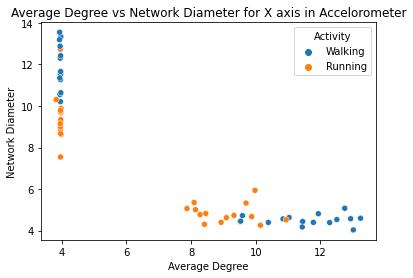

In [20]:
import pandas as pd
import seaborn as sns
visibility=pd.read_csv("Accelometer_Visibility_Graph_Data_Subjects-chest.csv")
display(visibility)
x_axis=visibility.loc[visibility['Accelorometer Axis']=='x']
x_axis1=x_axis.loc[(x_axis['Activity']=='Climbing Up')| (x_axis['Activity']=='Climbing Down')]
x_axis2=x_axis.loc[(x_axis['Activity']=='Walking')| (x_axis['Activity']=='Running')]
y_axis=visibility.loc[visibility['Accelorometer Axis']=='y']
y_axis1=y_axis.loc[(visibility['Activity']=='Climbing Up')| (visibility['Activity']=='Climbing Down')]
y_axis2=y_axis.loc[(visibility['Activity']=='Running')| (visibility['Activity']=='Walking')]
z_axis=visibility.loc[visibility['Accelorometer Axis']=='z']
z_axis1=z_axis.loc[(visibility['Activity']=='Climbing Up')| (visibility['Activity']=='Climbing Down')]
z_axis2=z_axis.loc[(visibility['Activity']=='Running')| (visibility['Activity']=='Walking')]
NVG=visibility.loc[visibility['Method']=='NVG']
NVG1=NVG.loc[(NVG['Activity']=='Climbing Up')| (NVG['Activity']=='Climbing Down')]
NVG2=NVG.loc[(NVG['Activity']=='Walking')| (NVG['Activity']=='Running')]
HVG=visibility.loc[visibility['Method']=='HVG']
HVG1=HVG.loc[(HVG['Activity']=='Climbing Up')| (HVG['Activity']=='Climbing Down')]
HVG2=HVG.loc[(HVG['Activity']=='Walking')| (HVG['Activity']=='Running')]


ax=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=x_axis2)
ax.set_title("Average Degree vs Network Diameter for X axis in Accelorometer")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Y axis in Accelorometer')

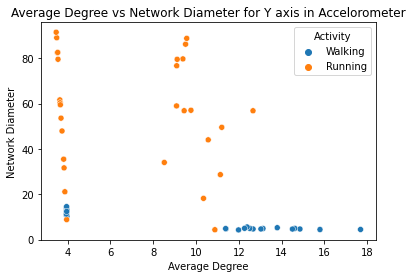

In [21]:
ax2=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=y_axis2)
ax2.set_title("Average Degree vs Network Diameter for Y axis in Accelorometer")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Z axis in Accelorometer')

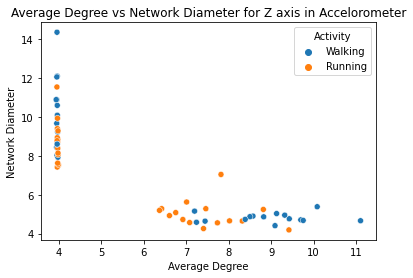

In [22]:
ax2=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=z_axis2)
ax2.set_title("Average Degree vs Network Diameter for Z axis in Accelorometer")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Natural Visibility Graph')

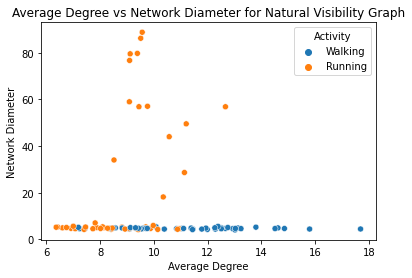

In [23]:
ax3=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=NVG2)
ax3.set_title("Average Degree vs Network Diameter for Natural Visibility Graph")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Horizontal Visibility Graph')

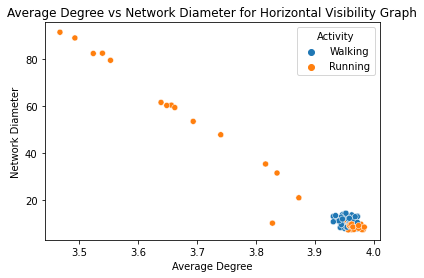

In [24]:
ax3=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=HVG2)
ax3.set_title("Average Degree vs Network Diameter for Horizontal Visibility Graph")



Scatterplots for Climbing Up/Down

Text(0.5, 1.0, 'Average Degree vs Network Diameter for X axis in Accelorometer')

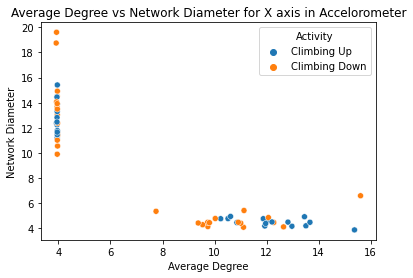

In [25]:
ax=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=x_axis1)
ax.set_title("Average Degree vs Network Diameter for X axis in Accelorometer")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Y axis in Accelorometer')

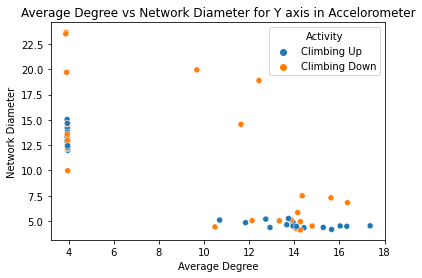

In [26]:
ax=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=y_axis1)
ax.set_title("Average Degree vs Network Diameter for Y axis in Accelorometer")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Z axis in Accelorometer')

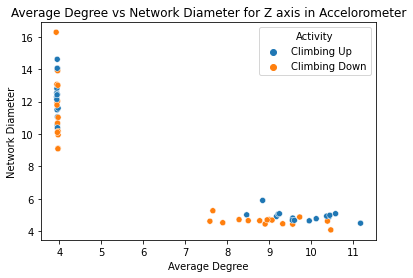

In [27]:
ax=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=z_axis1)
ax.set_title("Average Degree vs Network Diameter for Z axis in Accelorometer")

Text(0.5, 1.0, 'Average Degree vs Network Diameter for Natural Visibility in Accelorometer')

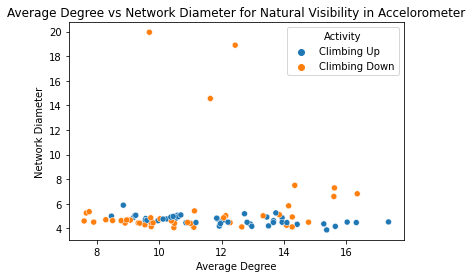

In [28]:
ax=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=NVG1)
ax.set_title("Average Degree vs Network Diameter for Natural Visibility in Accelorometer")

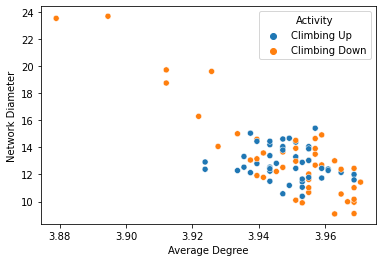

In [29]:
ax=sns.scatterplot(x="Average Degree", y="Network Diameter",hue="Activity",data=HVG1)

Task 2: Permutation Entropy and Complexity:

In [22]:
!pip install ordpy

The below code calculates permutation entroy and complexity for each signal length. I do not reccomend to run the below cell as it takes 30 minutes on average to create the full dataset. 
Please see "Accelrometer_Entropy_Complexity_Data_Subjects-chest.csv" file to view the dataset generated from the below cell.
thank you. 

In [31]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.simplefilter(action='ignore',category=RuntimeWarning)

import pandas as pd
import numpy as np
''' This module has essential functions supporting
fast and effective computation of permutation entropy and
its different variations.'''

####################Code for Perm Entropy and Complexity by Prof Srinivasan Radakrishnan####################
######################https://github.com/srk-srinivasan/Permutation-Entropy/blob/master/p_entropy.py###########

def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0]) 

#####################End of Borrowed Code###############################################################################
def complexity_entropy(data,dim,delay):
    od=ordinal_patterns(data,dim,delay)
    ent=p_entropy(od)
    cpx=complexity(od)
    return (ent,cpx)
    

def create_entropy_chart(body_part):
    path=""
    numsubjects=15
    Activity=["Walking","Running","Climbing Up", "Climbing Down"]
    
    axis=["x","y","z"]

    data = {'Subject': [],
            'Accelorometer Axis':[],
            'Signal Length':[],
            'Dimension':[],
            'Delay':[],
            'Permutation Entropy':[],
            'Complexity':[],
            'Activity':[],
            'Body Part':[]}
  
    # Create DataFrame
    chart = pd.DataFrame(data)



    for i in range(1,numsubjects+1):
        for j in Activity: 
            path="Subject "+str(i)+"/"+j+"/acc_"+j.lower().replace(" ","")+"_"+body_part+".csv"
            print(path)
            try:   
                file=pd.read_csv(path)  
            except:
                print("No such file exists")
                continue
            for l in axis:
                dims=[3,4,5,6]
                delays=[1,2,3]
                siglengths=[1024,2048,4096]
                for dim in dims:
                    for d in delays:
                        for sig in siglengths:
                            try:
                                length=0
                                optpartition=int(len(file)/sig)
                                for s in range(1,optpartition):
                                    a="attr_"+l
                                    entrop=complexity_entropy(file[a][length:length+sig],dim,d)
                                    data = {'Subject': i,
                                        'Accelorometer Axis':l,
                                        'Signal Length':sig,
                                        'Dimension':dim,
                                        'Delay':d,
                                        'Permutation Entropy':list(entrop)[0],
                                        'Complexity':list(entrop)[1],
                                        'Activity':j,
                                        'Body Part':body_part}
                                    chart=chart.append(data,ignore_index=True)
                                    length=length+sig
                            except:

                                data = {'Subject': i,
                                    'Accelorometer Axis':l,
                                    'Signal Length':sig,
                                    'Dimension':dim,
                                    'Delay':d,
                                    'Permutation Entropy':np.NaN,
                                    'Complexity':np.NaN,
                                    'Activity':j,
                                    'Body Part':body_part}
                                chart=chart.append(data,ignore_index=True)
    display(chart)
    return chart
chart2=create_entropy_chart("chest")
chart2.to_csv("Accelrometer_Entropy_Complexity_Data_Subjects-chest.csv")
chart2=chart2.dropna()

Subject 1/Walking/acc_walking_chest.csv
Subject 1/Running/acc_running_chest.csv
Subject 1/Climbing Up/acc_climbingup_chest.csv
Subject 1/Climbing Down/acc_climbingdown_chest.csv
Subject 2/Walking/acc_walking_chest.csv
Subject 2/Running/acc_running_chest.csv
Subject 2/Climbing Up/acc_climbingup_chest.csv
Subject 2/Climbing Down/acc_climbingdown_chest.csv
Subject 3/Walking/acc_walking_chest.csv
Subject 3/Running/acc_running_chest.csv
Subject 3/Climbing Up/acc_climbingup_chest.csv
Subject 3/Climbing Down/acc_climbingdown_chest.csv
Subject 4/Walking/acc_walking_chest.csv
Subject 4/Running/acc_running_chest.csv
Subject 4/Climbing Up/acc_climbingup_chest.csv
Subject 4/Climbing Down/acc_climbingdown_chest.csv
Subject 5/Walking/acc_walking_chest.csv
Subject 5/Running/acc_running_chest.csv
Subject 5/Climbing Up/acc_climbingup_chest.csv
Subject 5/Climbing Down/acc_climbingdown_chest.csv
Subject 6/Walking/acc_walking_chest.csv
Subject 6/Running/acc_running_chest.csv
Subject 6/Climbing Up/acc_clim

,Subject,Accelorometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity,Body Part
0,1.0,x,1024.0,3.0,1.0,0.855987,0.119191,Walking,chest
1,1.0,x,1024.0,3.0,1.0,0.831743,0.136355,Walking,chest
2,1.0,x,1024.0,3.0,1.0,0.818490,0.145093,Walking,chest
3,1.0,x,1024.0,3.0,1.0,0.810816,0.150244,Walking,chest
4,1.0,x,1024.0,3.0,1.0,0.807199,0.152708,Walking,chest
...,...,...,...,...,...,...,...,...,...
98275,15.0,z,4096.0,6.0,3.0,0.962741,0.085106,Climbing Down,chest
98276,15.0,z,4096.0,6.0,3.0,0.954761,0.100891,Climbing Down,chest
98277,15.0,z,4096.0,6.0,3.0,0.951974,0.106408,Climbing Down,chest
98278,15.0,z,4096.0,6.0,3.0,0.955139,0.098146,Climbing Down,chest


In [51]:
entrop=pd.read_csv("Accelrometer_Entropy_Complexity_Data_Subjects-chest.csv")
x_axispe=entrop.loc[entrop['Accelorometer Axis']=='x'].loc[entrop['Signal Length']==4096].loc[entrop['Delay']==1]
print(len(x_axispe))
x_axispe1=x_axispe.loc[(x_axispe['Activity']=='Climbing Up')| (x_axispe['Activity']=='Climbing Down')]
x_axispe2=x_axispe.loc[(x_axispe['Activity']=='Walking')| (x_axispe['Activity']=='Running')]
display(x_axispe2)
y_axispe=entrop.loc[entrop['Accelorometer Axis']=='y'].loc[entrop['Signal Length']==4096].loc[entrop['Delay']==1]
y_axispe1=y_axispe.loc[(entrop['Activity']=='Climbing Up')| (entrop['Activity']=='Climbing Down')]
y_axispe2=y_axispe.loc[(entrop['Activity']=='Running')| (entrop['Activity']=='Walking')]
z_axispe=entrop.loc[entrop['Accelorometer Axis']=='z'].loc[entrop['Signal Length']==4096].loc[entrop['Delay']==1]
z_axispe1=z_axispe.loc[(entrop['Activity']=='Climbing Up')| (entrop['Activity']=='Climbing Down')]
z_axispe2=z_axispe.loc[(entrop['Activity']=='Running')| (entrop['Activity']=='Walking')]
dim3=entrop.loc[entrop['Dimension']==3].loc[entrop['Signal Length']==4096].loc[entrop['Delay']==1]
dim31=dim3.loc[(entrop['Activity']=='Climbing Up')| (entrop['Activity']=='Climbing Down')]
dim32=dim3.loc[(entrop['Activity']=='Walking')| (entrop['Activity']=='Running')]
dim4=entrop.loc[entrop['Dimension']==4].loc[entrop['Signal Length']==4096].loc[entrop['Delay']==1]
dim41=dim4.loc[(entrop['Activity']=='Climbing Up')| (entrop['Activity']=='Climbing Down')]
dim42=dim4.loc[(entrop['Activity']=='Walking')| (entrop['Activity']=='Running')]
dim5=entrop.loc[entrop['Dimension']==5].loc[entrop['Signal Length']==4096].loc[entrop['Delay']==1]
dim51=dim5.loc[(entrop['Activity']=='Climbing Up')| (entrop['Activity']=='Climbing Down')]
dim52=dim5.loc[(entrop['Activity']=='Walking')| (entrop['Activity']=='Running')]
dim6=entrop.loc[entrop['Dimension']==6].loc[entrop['Signal Length']==4096].loc[entrop['Delay']==1]
dim61=dim6.loc[(entrop['Activity']=='Climbing Up')| (entrop['Activity']=='Climbing Down')]
dim62=dim6.loc[(entrop['Activity']=='Walking')| (entrop['Activity']=='Running')]


1360


,Unnamed: 0,Subject,Accelorometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity,Body Part
44,44,1.0,x,4096.0,3.0,1.0,0.830818,0.136888,Walking,chest
45,45,1.0,x,4096.0,3.0,1.0,0.822217,0.142415,Walking,chest
46,46,1.0,x,4096.0,3.0,1.0,0.819610,0.144628,Walking,chest
47,47,1.0,x,4096.0,3.0,1.0,0.808745,0.150906,Walking,chest
48,48,1.0,x,4096.0,3.0,1.0,0.812239,0.148817,Walking,chest
...,...,...,...,...,...,...,...,...,...,...
93775,93775,15.0,x,4096.0,6.0,1.0,0.813091,0.251942,Running,chest
93776,93776,15.0,x,4096.0,6.0,1.0,0.806998,0.266620,Running,chest
93777,93777,15.0,x,4096.0,6.0,1.0,0.802544,0.268865,Running,chest
93778,93778,15.0,x,4096.0,6.0,1.0,0.823370,0.252456,Running,chest


Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1')

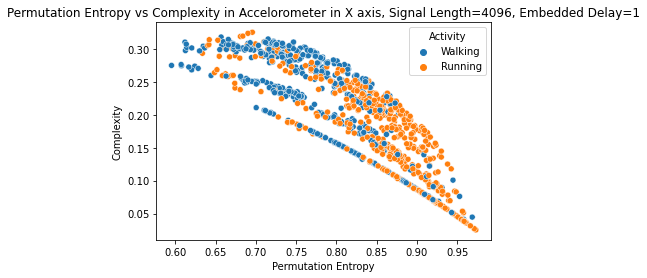

In [32]:
import seaborn as sns
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=x_axispe2)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in X axis, Signal Length=4096, Embedded Delay=1")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1')

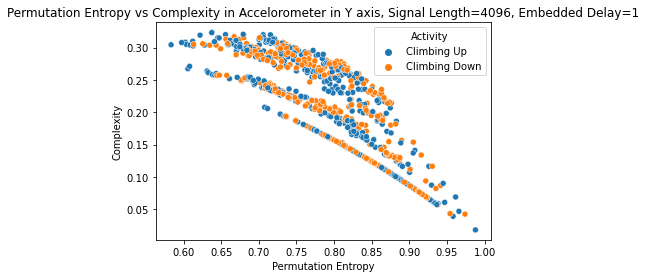

In [33]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=x_axispe1)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1')

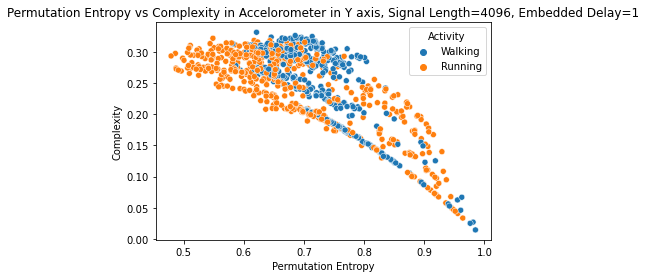

In [34]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=y_axispe2)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1')

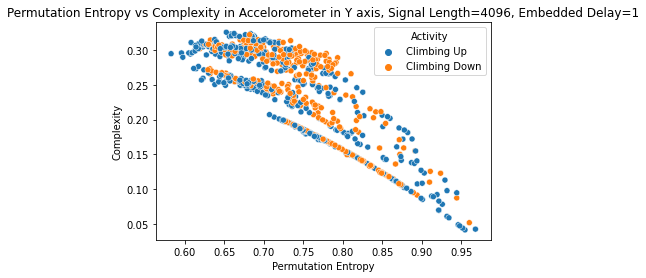

In [35]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=y_axispe1)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Y axis, Signal Length=4096, Embedded Delay=1")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1')

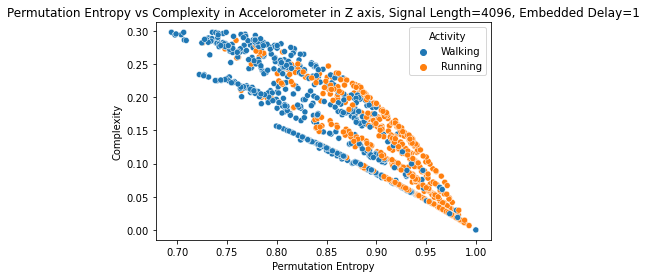

In [36]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=z_axispe2)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1')

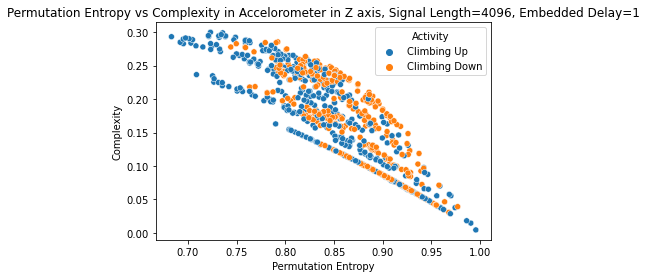

In [37]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=z_axispe1)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer in Z axis, Signal Length=4096, Embedded Delay=1")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer for Embedded Dimension=3, Signal Length=4096, Embedded Delay=1')

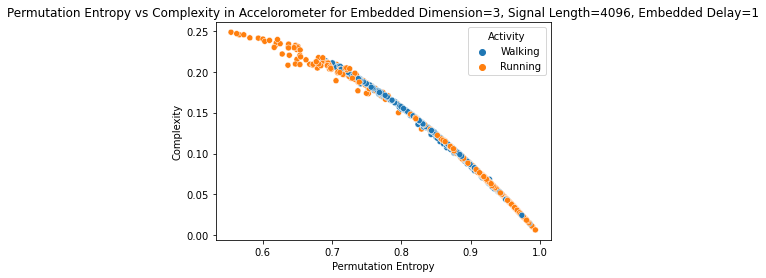

In [38]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=dim32)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer for Embedded Dimension=3, Signal Length=4096, Embedded Delay=1")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer for Embedded Dimension=3, Signal Length=4096, Embedded Delay=1')

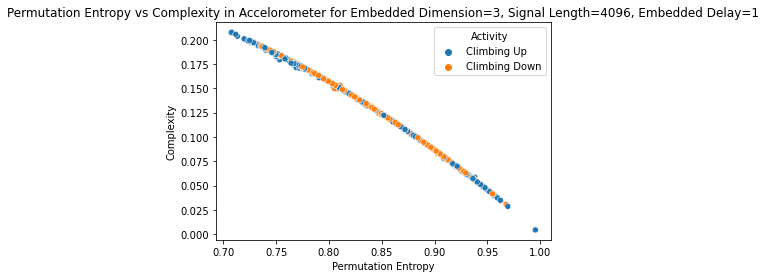

In [39]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=dim31)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer for Embedded Dimension=3, Signal Length=4096, Embedded Delay=1")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer for Embedded Dimension=4, Signal Length=4096, Embedded Delay=1')

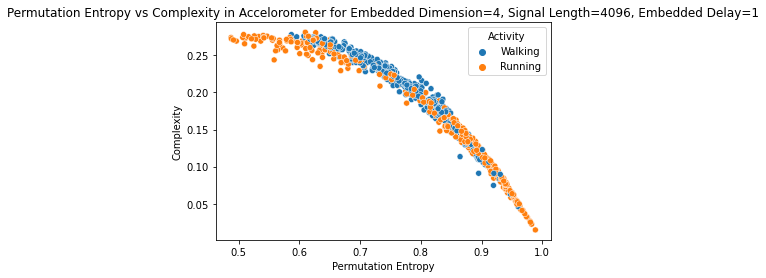

In [40]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=dim42)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer for Embedded Dimension=4, Signal Length=4096, Embedded Delay=1")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer for Embedded Dimension=4, Signal Length=4096, Embedded Delay=1')

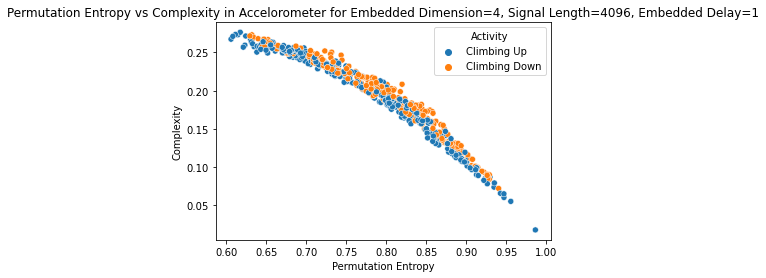

In [41]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=dim41)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer for Embedded Dimension=4, Signal Length=4096, Embedded Delay=1")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer for Embedded Dimension=5, Signal Length=4096, Embedded Delay=1')

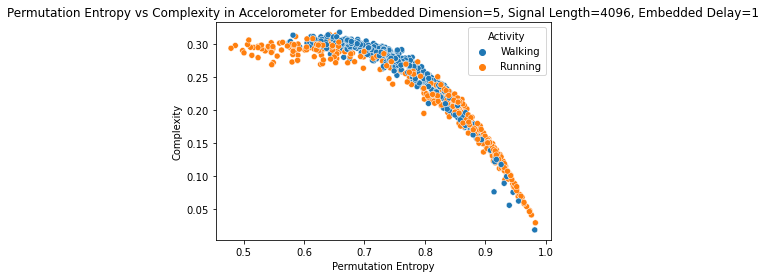

In [42]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=dim52)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer for Embedded Dimension=5, Signal Length=4096, Embedded Delay=1")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer for Embedded Dimension=5, Signal Length=4096, Embedded Delay=1')

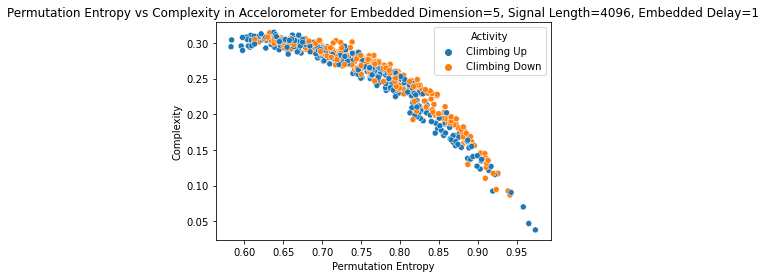

In [43]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=dim51)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer for Embedded Dimension=5, Signal Length=4096, Embedded Delay=1")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer for Embedded Dimension=6, Signal Length=4096, Embedded Delay=1')

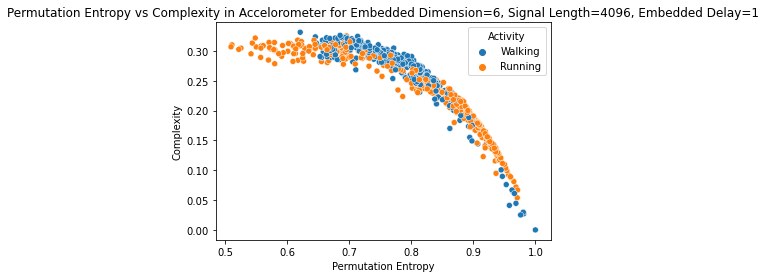

In [44]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=dim62)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer for Embedded Dimension=6, Signal Length=4096, Embedded Delay=1")

Text(0.5, 1.0, 'Permutation Entropy vs Complexity in Accelorometer for Embedded Dimension=6, Signal Length=4096, Embedded Delay=1')

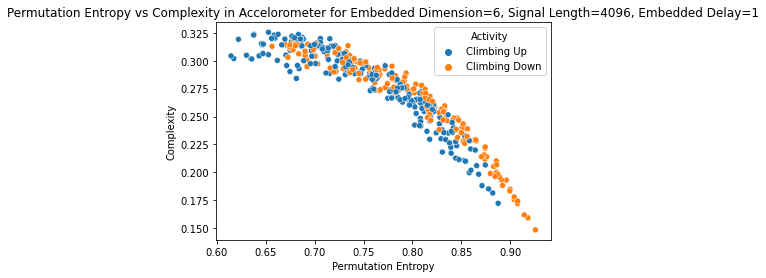

In [52]:
ax=sns.scatterplot(x="Permutation Entropy", y="Complexity",hue="Activity",data=dim61)
ax.set_title("Permutation Entropy vs Complexity in Accelorometer for Embedded Dimension=6, Signal Length=4096, Embedded Delay=1")

From the scatterplots on both Network diameter and avg degree, it has been shown that Walking and Running are relatively classifiable because of a difference in movement per delta(T). However, climbing up and down are seen to be of exact same movement but in a different direction and are almost impossible to classify. 